In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.shape

(891, 12)

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.isnull().sum()
#number of missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

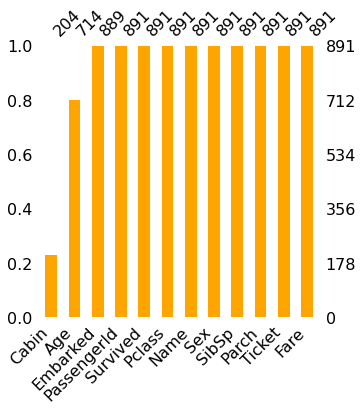

In [7]:
msno.bar(train ,figsize = (5,5), sort = 'ascending', color = 'orange') #shows number of full values in the columns

In [ ]:
#cabin has too many missing values, therefore drop cabin
#train.drop(axis = 1,columns = 'Cabin',) #change inplace value later

<AxesSubplot:xlabel='Survived', ylabel='count'>

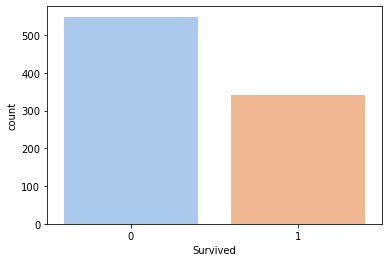

In [8]:
sb.countplot(x = 'Survived', data = train, palette = "pastel")

In [ ]:
sb.countplot(x = 'Survived', hue = 'Pclass', data = train, palette = "pastel" )

In [ ]:
sb.countplot(x = 'Survived', hue = 'Sex', data = train, palette = "pastel" )

In [ ]:
sb.countplot(x = 'Embarked', data = train, palette = 'pastel', hue = 'Survived')

In [ ]:
sb.countplot(x = 'Survived', hue = 'SibSp', data = train, palette = "pastel" )
plt.legend(loc= 'upper right')

In [ ]:
survived = train['Survived'] == 1
sb.distplot(train[~survived]['Age'], label='Not Survived', hist=True, color = 'r', bins = 13)
sb.distplot(train[survived]['Age'], label='Survived', hist=True, color='g', bins = 13)
#print(sb.distplot(train['Age'],  color = 'orange'))
#print(train['Age'].mean())

In [ ]:
sb.distplot(train[~survived]['Fare'], label='Not Survived', hist=True, color = 'r', bins=15)
sb.distplot(train[survived]['Fare'], label='Survived', hist=True, color='g', bins = 15)

In [ ]:
print(sb.histplot(train['Fare'],  color = 'orange' ))
print(train['Fare'].mean())
print(train['Fare'].median())

In [ ]:
sb.countplot(x = 'Pclass', data = train)

In [ ]:
sb.boxplot(x = 'Survived', y = 'Age', data = train, palette = "pastel")

In [ ]:
sb.boxplot(x = 'Pclass', y = 'Age', data = train, palette = "pastel")

In [ ]:
sb.boxplot(x = 'Survived', y = 'Age', data = train, palette = "pastel", hue = 'Pclass')
#gives average age of survivor class wise

In [9]:
def fillvals(cols):
    Age = cols[0]
    #print(type(Age))
    Pclass = cols[1]
    Survived = cols[2]
    if pd.isnull(Age):
        if Survived == 0:
            if Pclass == 1:
                return 45
            elif Pclass == 2:
                return 30
            else:
                return 25
        if Survived == 1:
            if Pclass == 1:
                return 35
            elif Pclass == 2:
                return 27
            else:
                return 22
    else:
        return Age
train['Age'] = train[['Age','Pclass', 'Survived']].apply(fillvals, axis=1)
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
msno.bar(train ,figsize = (5,5), sort = 'ascending', color = 'orange')

In [ ]:
#train.drop(columns = 'Cabin',axis=1,inplace = True)

In [ ]:
train.head()

In [ ]:
msno.bar(train ,figsize = (5,5), sort = 'ascending', color = 'orange')

In [10]:
train['Embarked'].fillna('S', inplace = True)


In [ ]:
msno.bar(train ,figsize = (5,5), sort = 'ascending', color = 'orange')

In [ ]:
#train['Fare'] = pd.qcut(train['Fare'], 15)

In [ ]:
sb.countplot(x = 'Fare', hue = 'Survived', data = train)

In [ ]:
#train['Age'] = pd.qcut(train['Age'], 10) 

In [ ]:
sb.countplot(x = 'Age', hue = 'Survived', data = train)

<AxesSubplot:xlabel='FamSize', ylabel='count'>

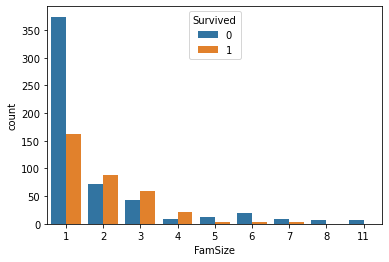

In [11]:
train['FamSize'] = train['SibSp'] + train['Parch']+1
train['FamSize'].value_counts()
sb.countplot(x = 'FamSize', hue = 'Survived', data = train)

In [12]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamSize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [13]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamSize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [14]:
from sklearn.preprocessing import LabelEncoder
feat = ['Sex', 'Age', 'Fare', 'Embarked']
for i in feat:        
        train[i] = LabelEncoder().fit_transform(train[i])

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Name         891 non-null    object
 4   Sex          891 non-null    int32 
 5   Age          891 non-null    int64 
 6   SibSp        891 non-null    int64 
 7   Parch        891 non-null    int64 
 8   Ticket       891 non-null    object
 9   Fare         891 non-null    int64 
 10  Cabin        204 non-null    object
 11  Embarked     891 non-null    int32 
 12  FamSize      891 non-null    int64 
dtypes: int32(2), int64(8), object(3)
memory usage: 83.7+ KB


In [16]:
train['Cabin'].isnull().sum()
train.drop('Cabin',inplace = True, axis=1)

In [17]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamSize
0,1,0,3,"Braund, Mr. Owen Harris",1,28,1,0,A/5 21171,18,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,51,1,0,PC 17599,207,0,2
2,3,1,3,"Heikkinen, Miss. Laina",0,34,0,0,STON/O2. 3101282,41,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,47,1,0,113803,189,2,2
4,5,0,3,"Allen, Mr. William Henry",1,47,0,0,373450,43,2,1


In [19]:
features = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','FamSize']
x = train[features]
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize
0,3,1,28,1,0,18,2,2
1,1,0,51,1,0,207,0,2
2,3,0,34,0,0,41,2,1
3,1,0,47,1,0,189,2,2
4,3,1,47,0,0,43,2,1
...,...,...,...,...,...,...,...,...
886,2,1,35,0,0,85,2,1
887,1,0,24,0,0,153,2,1
888,3,0,33,1,2,131,2,4
889,1,1,34,0,0,153,0,1


In [21]:
y = train['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [22]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize
0,3,1,28,1,0,18,2,2
1,1,0,51,1,0,207,0,2
2,3,0,34,0,0,41,2,1
3,1,0,47,1,0,189,2,2
4,3,1,47,0,0,43,2,1
...,...,...,...,...,...,...,...,...
886,2,1,35,0,0,85,2,1
887,1,0,24,0,0,153,2,1
888,3,0,33,1,2,131,2,4
889,1,1,34,0,0,153,0,1


In [26]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

 accuracy is 0.777
              precision    recall  f1-score   support

           0       0.75      0.89      0.82       100
           1       0.82      0.63      0.71        79

    accuracy                           0.78       179
   macro avg       0.79      0.76      0.77       179
weighted avg       0.78      0.78      0.77       179



In [25]:
scores_accuracy = cross_val_score(logreg, x, y, cv=10, scoring='accuracy')
print(" average accuracy after cv is %2.3f" % scores_accuracy.mean())

 average accuracy after cv is 0.800


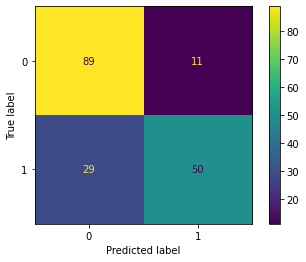

In [27]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg, X_test, y_test)